In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

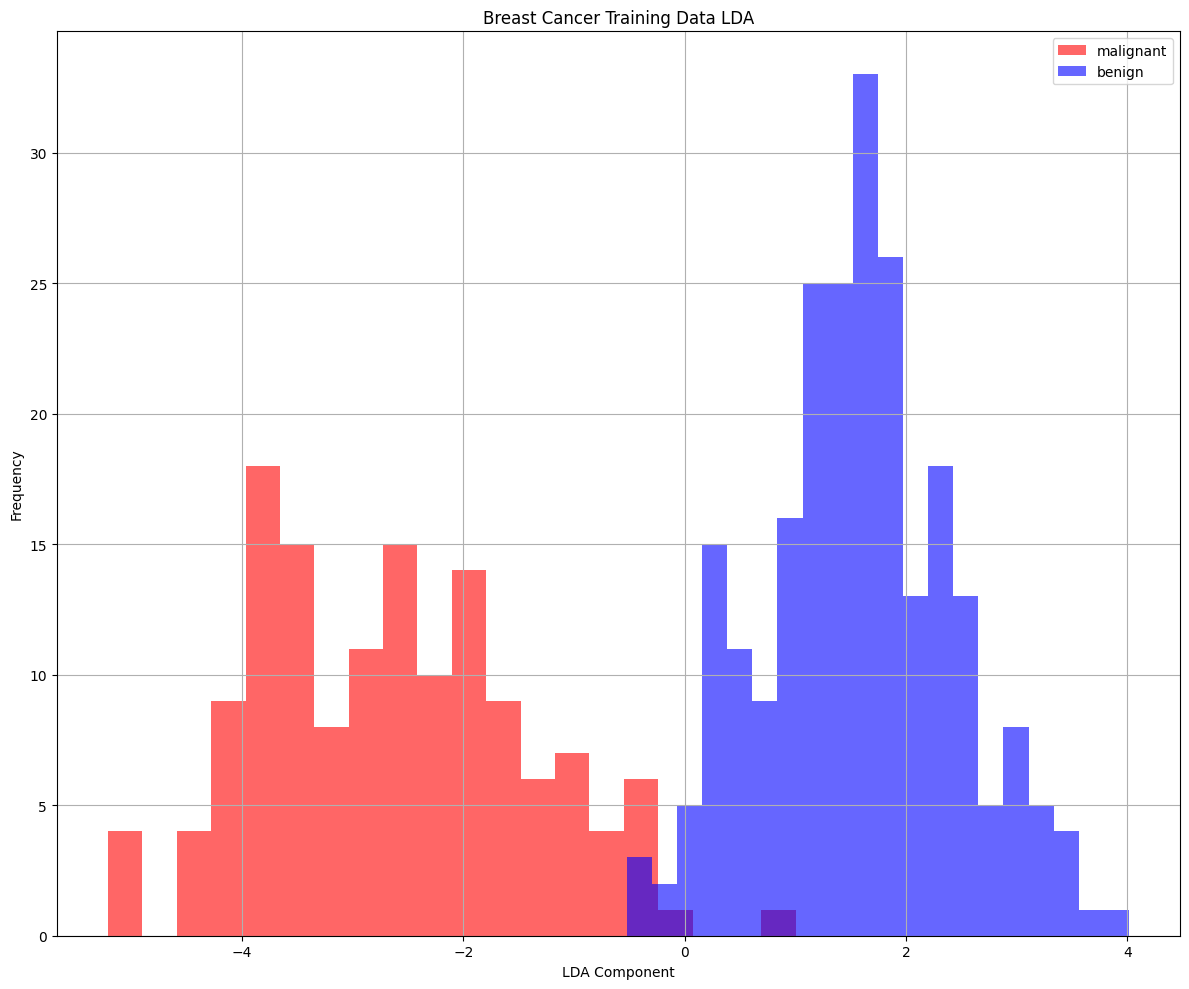

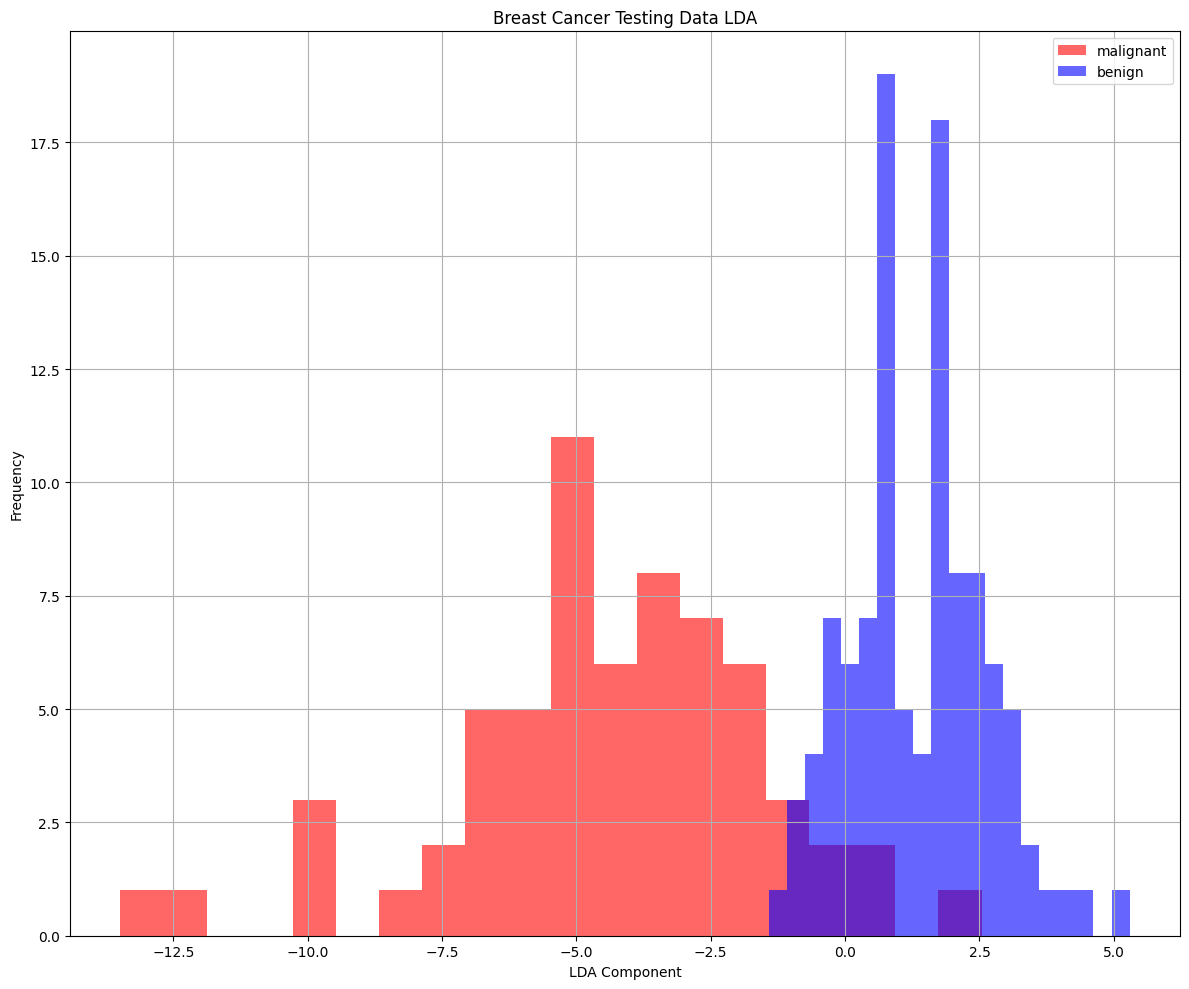

[I 2025-04-27 11:21:17,444] A new study created in memory with name: no-name-0d1dda03-bd2e-4e38-aebf-84acd42067db
[I 2025-04-27 11:21:17,467] Trial 0 finished with value: 0.6263157894736843 and parameters: {'C': 0.0020208352169585296, 'kernel': 'poly', 'gamma': 0.0009092745934742328, 'degree': 3, 'max_iter': 6266}. Best is trial 0 with value: 0.6263157894736843.
[I 2025-04-27 11:21:17,478] Trial 1 finished with value: 0.9842105263157895 and parameters: {'C': 0.2465743810271629, 'kernel': 'sigmoid', 'gamma': 5.657444255598518, 'max_iter': 7048}. Best is trial 1 with value: 0.9842105263157895.
[I 2025-04-27 11:21:17,488] Trial 2 finished with value: 0.9815789473684211 and parameters: {'C': 0.0820587216750577, 'kernel': 'linear', 'max_iter': 1237}. Best is trial 1 with value: 0.9842105263157895.
[I 2025-04-27 11:21:17,497] Trial 3 finished with value: 0.9868421052631579 and parameters: {'C': 4.170373730161773, 'kernel': 'linear', 'max_iter': 1997}. Best is trial 3 with value: 0.9868421052

Best trial:
Accuracy: 0.9894736842105264
Best hyperparameters:  {'C': 0.4172502190670345, 'kernel': 'sigmoid', 'gamma': 0.7023822608826642, 'max_iter': 1545}


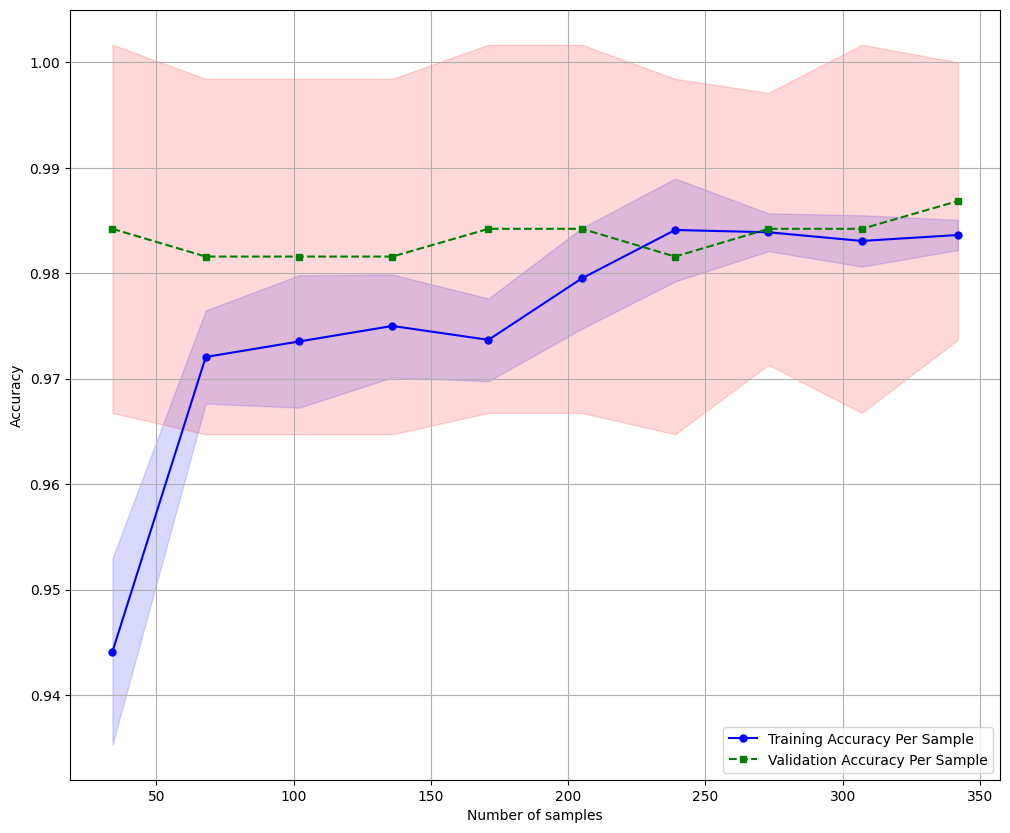

Confusion Matrix
[[61  3]
 [17 90]]
Accuracy: 0.8830, Precision: 0.9677, Recall: 0.8411, F1: 0.9000, AUC: 0.8572


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)